In [17]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset dari URL
url = "https://raw.githubusercontent.com/WilliamKesuma/Data-Mining/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)

# Melihat sekilas data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [18]:
# Informasi dasar tentang dataset
data.info()

# Statistik deskriptif
data.describe()

# Mengecek missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# untuk menampilkan jumlah / frekuensi kemunculan setiap nilai unik di setiap kolom dalam dataframe
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for col in columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for Pregnancies:
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


Value counts for Glucose:
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


Value counts for BloodPressure:
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


Value counts for SkinThickness:
0     227
32     

In [20]:
# Replace zero values in certain columns with the median of that column (excluding actual zero values)
data.dropna(inplace=True)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

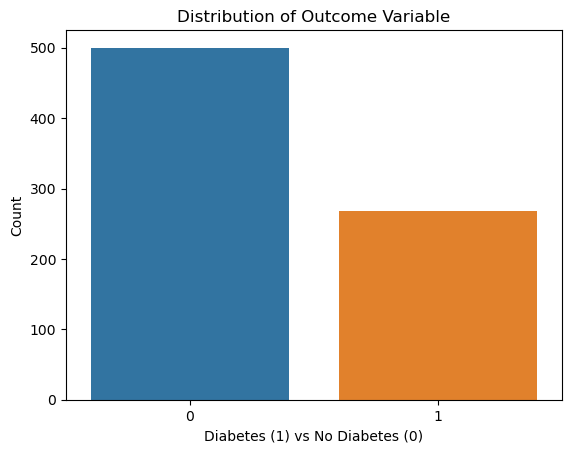

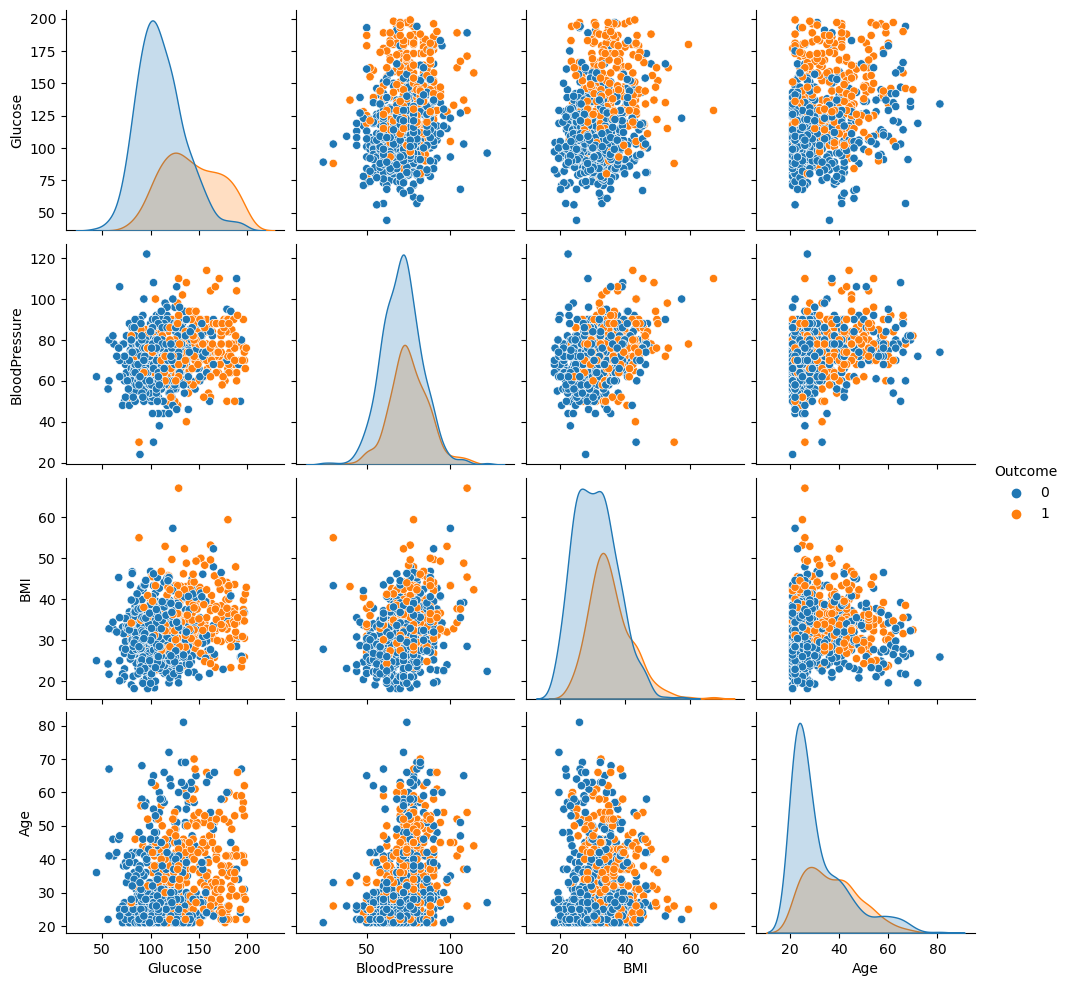

In [8]:
# Visualize distribution of target variable
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Diabetes (1) vs No Diabetes (0)')
plt.ylabel('Count')
plt.show()

# Pairplot of select features to observe relationships and distribution across Outcome
sns.pairplot(data[['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

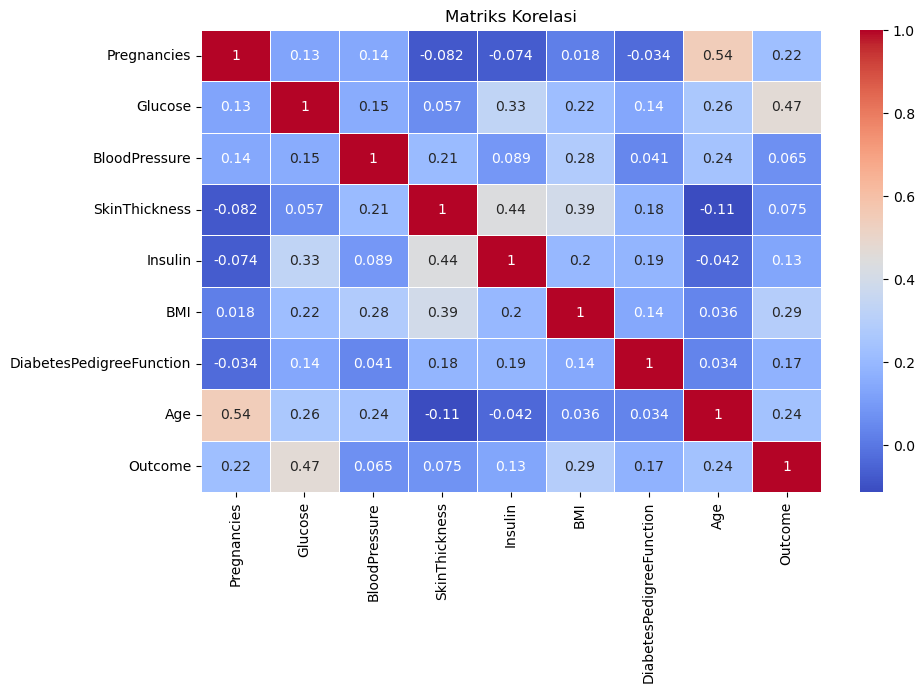

In [21]:
plt.figure(figsize=(10, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

Gambar ini merupakan matriks korelasi yang menunjukkan hubungan antar variabel dalam dataset. Warna merah menunjukkan korelasi positif, biru menunjukkan korelasi negatif, dan warna yang lebih gelap menunjukkan korelasi yang lebih kuat.
Terdapat korelasi positif yang tinggi (0,47) antara glukosa dan outcome, menunjukkan bahwa glukosa berhubungan erat dengan outcome diabetes.
Terdapat juga korelasi positif yang kuat antara usia dan kehamilan (0,54).
Terdapat korelasi sedang (0,29) antara BMI dan outcome, menunjukkan bahwa BMI mempengaruhi outcome diabetes.

In [24]:
for col in data.columns:
    print(f"Nilai unik untuk {col}:")
    print(data[col].unique())
    print("\n")

Nilai unik untuk Pregnancies:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


Nilai unik untuk Glucose:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


Nilai unik untuk BloodPressure:
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


Nilai unik untuk SkinThickness:
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21

# Machine Learning

In [25]:
# memisahkan variabel independen (X) dari target variabel dependen (y) dalam persiapan untuk model machine learning
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [27]:

# split data untuk training dan test set (test size 20% and random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# cek banyak kolom dan baris pada data X_train dan X_test
X_train.shape, X_test.shape

((614, 8), (154, 8))

# Desicion Tree Gini

In [29]:
# membuat dan melatih model Decision Tree dengan menggunakan metode Gini untuk model klasifikasinya lalu membatasinya hingga maksimal tiga tingkat (max_depth = 3)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
# untuk membuat prediksi menggunakan model Decision Tree dengan metode Gini yang sudah dilatih sebelumnya
y_pred_gini = clf_gini.predict(X_test)

In [31]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))

# perbedaan antara hasil pelatihan dan  pengujian dapat menunjukkan apakah model mengalami overfitting
# jika hasil Training set score jauh lebih tinggi daripada hasil Test set score , maka artinya model mengalami overfitting

Model accuracy score with criterion gini index: 0.7597
Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(0.875, 0.375, 'x[1] <= 165.5\ngini = 0.4\nsamples = 163\nvalue = 

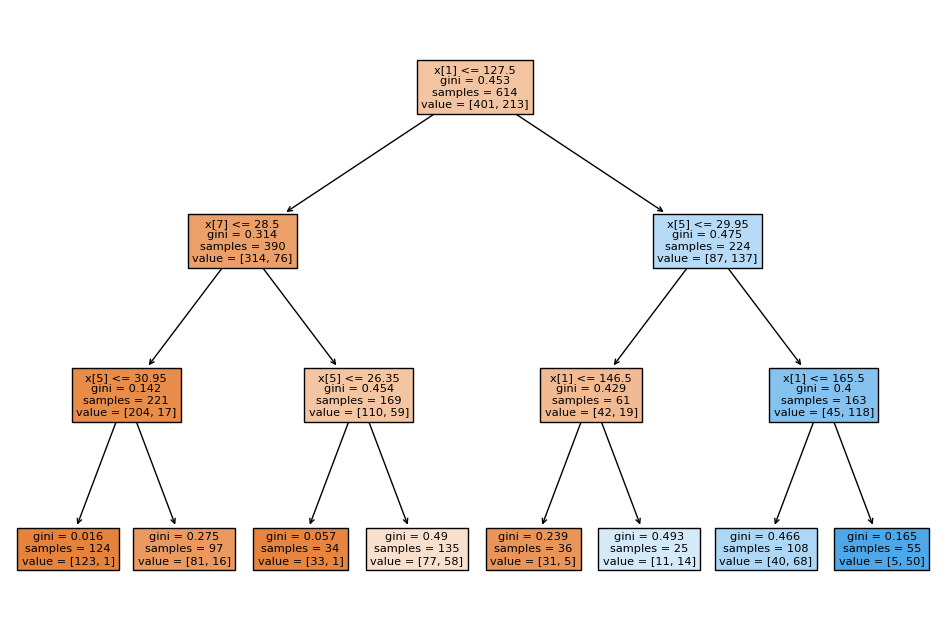

In [35]:
# untuk menampilkan visualisasi pohon keputusan yang dilatih menggunakan Decision Tree dengan metode Gini
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)

# Desicion Tree Entropy

In [36]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
y_pred_en = clf_en.predict(X_test)

In [38]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(clf_en.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(clf_en.score(X_test, y_test)))

Model accuracy score with criterion entropy: 0.7662
Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples = 28\nvalue = [13, 15]'),
 Text(0.875, 0.375, 'x[1] <= 165.5

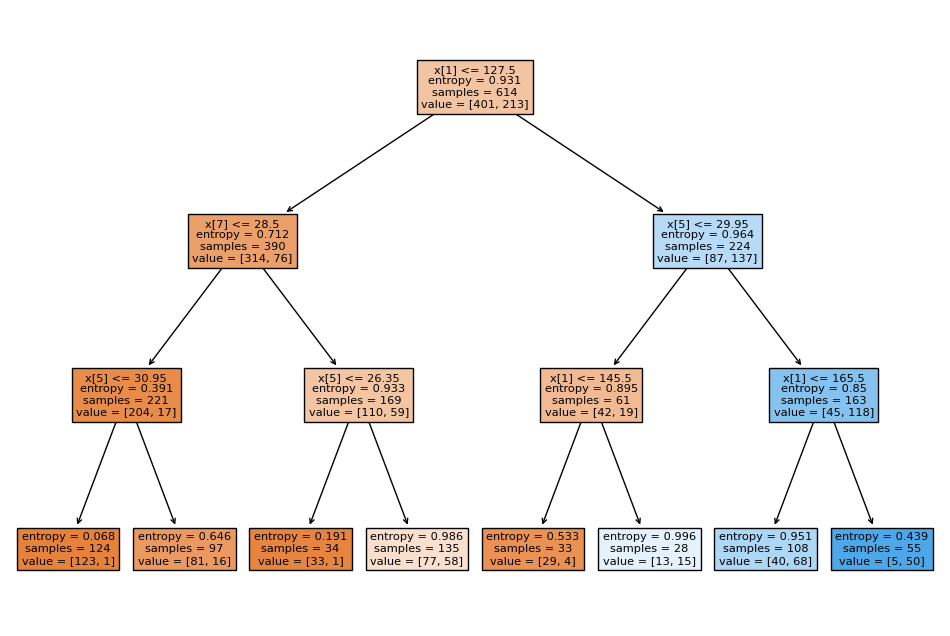

In [39]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

In [40]:
# untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari dua model klasifikasi yang berbeda
# yaitu model yang menggunakan Gini dan model yang menggunakan Entropy
gini = confusion_matrix(y_test, y_pred_gini)
entropi = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix gini index: \n', gini)
print('Confusion matrix entropy: \n', entropi)

Confusion matrix gini index: 
 [[83 16]
 [21 34]]
Confusion matrix entropy: 
 [[83 16]
 [20 35]]


In [41]:
# untuk mencetak laporan klasifikasi (classification report) dari dua model klasifikasi yang berbeda
# yaitu model yang menggunakan Gini dan model yang menggunakan Entropy
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



# Decision Tree Conclusion

**Decision Tree Conclusion**

- **Model Accuracy**: The model using entropy achieved a slightly higher accuracy (0.7662) compared to the model using the Gini index (0.7597). While the difference is minor, the entropy model performed slightly better at predicting the test data.
- **Confusion Matrix**: For class 0, both models produced identical results, with 83 correct predictions and 16 incorrect ones. In class 1, the entropy model achieved 35 correct predictions (recall 0.64) with 20 incorrect, while the Gini model had 34 correct predictions (recall 0.62) and 21 incorrect.
- **Classification Report**:
  - **Precision and Recall**: For class 0, both models had equal precision and recall. However, for class 1, the entropy model showed a slight edge in precision and recall over the Gini model, contributing to a slightly higher F1 score.
  - **Macro and Weighted Average**: The entropy model also had slightly better macro and weighted averages, indicating a consistently stronger performance across all classes.
  
Overall, the entropy model is superior and may be preferred if this minor improvement is considered significant.

# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
# membuat dan melatih model Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [44]:
nb_y_pred = nb_classifier.predict(X_test)

In [45]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Accuracy Score with GaussianNB: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(nb_classifier.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(nb_classifier.score(X_test, y_test)))

# Perbedaan antara hasil pelatihan dan  pengujian dapat menunjukkan apakah model mengalami overfitting
# jika hasil Training set score jauh lebih tinggi daripada hasil Test set score , maka artinya model mengalami overfitting

Accuracy Score with GaussianNB: 0.7662
Training set score: 0.7524
Test set score: 0.7662


In [46]:
# untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari model klasifikasi Naive Bayes
Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

# untuk mencetak laporan klasifikasi (classification report) dari model klasifikasi Naive Bayes
print('\nClassification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))

Confusion matrix GaussianNB: 
 [[79 20]
 [16 39]]

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# K-Nearest Neighbors (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
# membuat dan melatih model KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred_knn = clf_knn.predict(X_test)

In [50]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with KNN: {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(clf_knn.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(clf_knn.score(X_test, y_test)))

# perbedaan antara hasil pelatihan dan  pengujian dapat menunjukkan apakah model mengalami overfitting
# jika hasil Training set score jauh lebih tinggi daripada hasil Test set score , maka artinya model mengalami overfitting

Model accuracy score with KNN: 0.6623
Training set score: 0.7980
Test set score: 0.6623


In [51]:
# untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari model klasifikasi KNN
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix KNN:\n', confusion_knn)

# untuk mencetak laporan klasifikasi (classification report) dari model klasifikasi KNN
print('\nClassification Report KNN')
print(classification_report(y_test, y_pred_knn))

Confusion Matrix KNN:
 [[70 29]
 [23 32]]

Classification Report KNN
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



**Conclusion**

Both the **Decision Tree (Entropy)** and **Naive Bayes** models achieved the same accuracy on the test data at 0.7662, outperforming **K-Nearest Neighbors (KNN)**, which had a lower accuracy of 0.6623. 

This indicates that Decision Tree (Entropy) and Naive Bayes are more reliable for predictions with this dataset. Notably, Naive Bayes performed better at identifying the minority class, achieving a recall of 0.71 and a balanced F1 score across both classes, slightly surpassing the Decision Tree's recall of 0.64 for class 1.

**K-Nearest Neighbors (KNN)** struggled with lower accuracy and had difficulty predicting class 1, with a precision of 0.52 and recall of 0.58, showing weaker performance on this dataset.

**Final Conclusion**: Both Decision Tree (Entropy) and Naive Bayes are suitable predictive models, with Naive Bayes slightly better at handling the minority class. KNN, due to its lower precision and recall, is not recommended for this dataset.